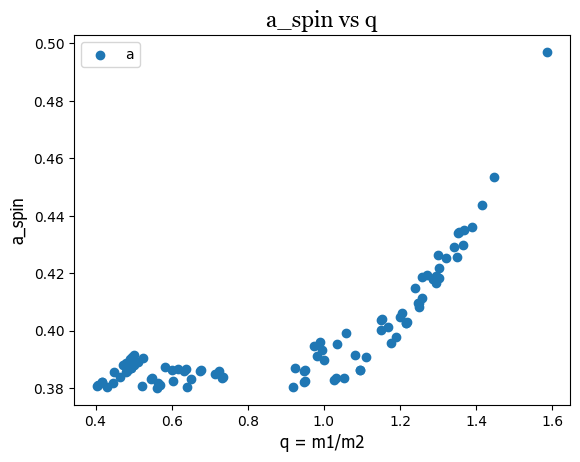

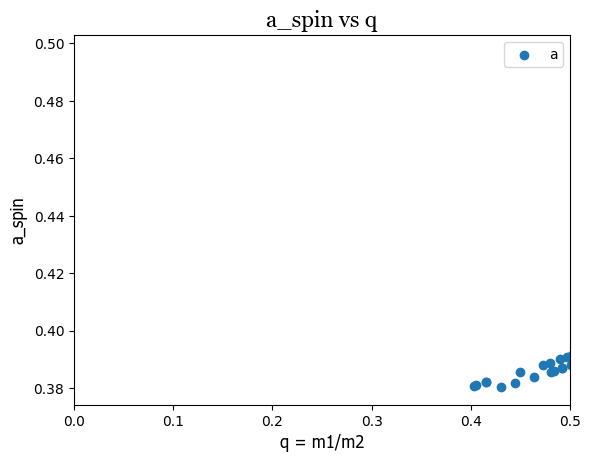

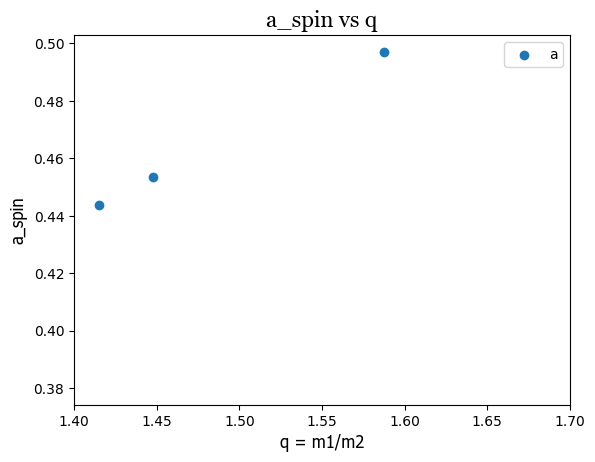

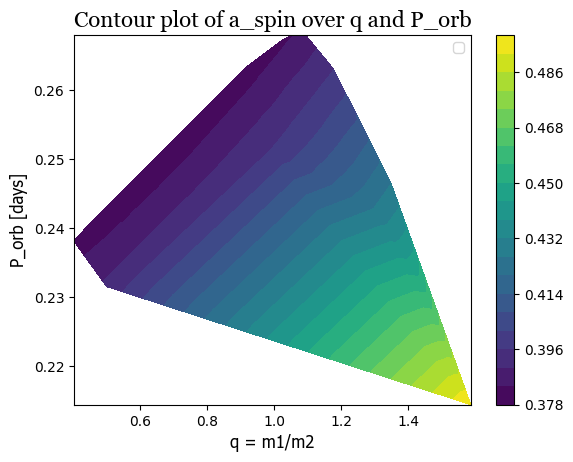

In [4]:
# plots for all ok cases (my precious)

# important libs and constants
import plot_utils as p
import numpy as np
import csv
G = 6.674e-11  # N*m^2/Kg^2
Msolar = 1.989e30  # kg
Rsolar = 6.957e8  # in m
c = 299792458.0  # m/s

# containers for all solutions (for combined plots)
all_q = []
all_a_spin = []
all_kQ = []
all_P_orb = []

with open("all_ok.csv", "r") as o:
    reader = csv.DictReader(o)
    for row in reader:
        sol_id = row["ID"]

        data = np.load(f"solutions/{sol_id}.npz")
        t = data["t"]
        f = data["f"]
        Omega = data["Omega"]

        # read metadata from csv
        m1 = float(row["m_WR/M_Sun"])
        m2 = float(row["m_companion/M_Sun"])
        a0 = float(row["initial separation a0 (m)"])
        Omega0 = float(row["initial spin Omega0 (Hz)"])
        f0 = float(row["initial frequency f0 (Hz)"])
        k = float(row["k"])
        Q = float(row["Q"])
        R1 = float(row["WR star Radius R_WR"])
        lifetime = float(row["lifetime (years)"])
        T_TF = float(row["tidal function timescale (years)"])
        f_final = float(row["f_final (Hz)"])
        Omega_final = float(row["Omega_final (Hz)"])
        J = float(row["final angular momentum J (kg m^2/s)"])
        a_spin = float(row["spin parameter a_spin"])
        a_final = float(row["final separation a_final (m)"])
        a_min_si = float(row["minimum separation a_min (m)"])
        q = m1/m2

        all_q.append(q)
        all_a_spin.append(a_spin)
        all_kQ.append(k/Q)
        all_P_orb.append(2/f_final)

q_array = np.array(all_q)
a_spin_array = np.array(all_a_spin)
kQ_array = np.array(all_kQ)
P_orb_array = np.array(all_P_orb)

# plot a_spin vs q
p.scatter2d(q_array, a_spin_array, xlabel='q = m1/m2', ylabel='a_spin', 
            title=f"a_spin vs q", legend='a_spin(q)', colour=None, axis_font="tahoma", axis_size=12, title_font="georgia", title_size=16, legend_size=10)     

p.scatter2d(q_array, a_spin_array, xlabel='q = m1/m2',
            ylabel='a_spin', title=f"a_spin vs q", legend='a_spin(q)', colour=None, xlim=(0, 0.5), axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

p.scatter2d(q_array, a_spin_array, xlabel='q = m1/m2',
            ylabel='a_spin', title=f"a_spin vs q", legend='a_spin(q)', colour=None, xlim=(1.4, 1.7), axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

# plot q vs k/Q with a contour for a_spin
p.plot2d_contour(q_array, P_orb_array/(3600*24), a_spin_array, xlabel='q = m1/m2', ylabel='P_orb [days]',
                 title=f"Contour plot of a_spin over q and P_orb", legend='a_spin(q, k/Q)', axis_font="tahoma", axis_size=12, title_font="georgia", title_size=16, legend_size=10)

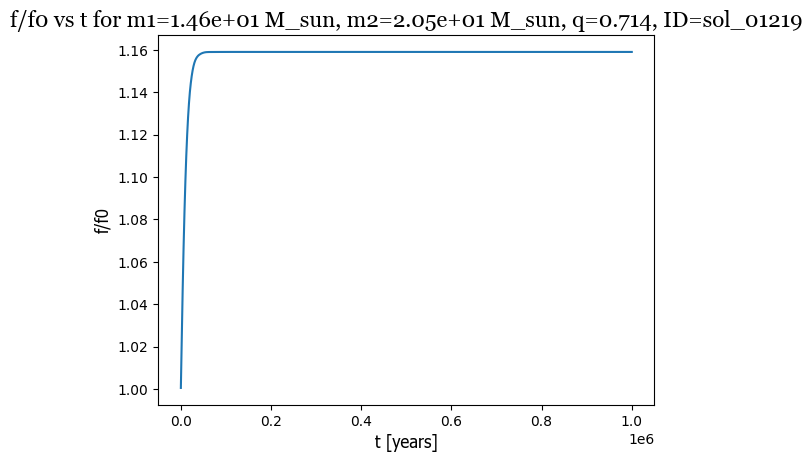

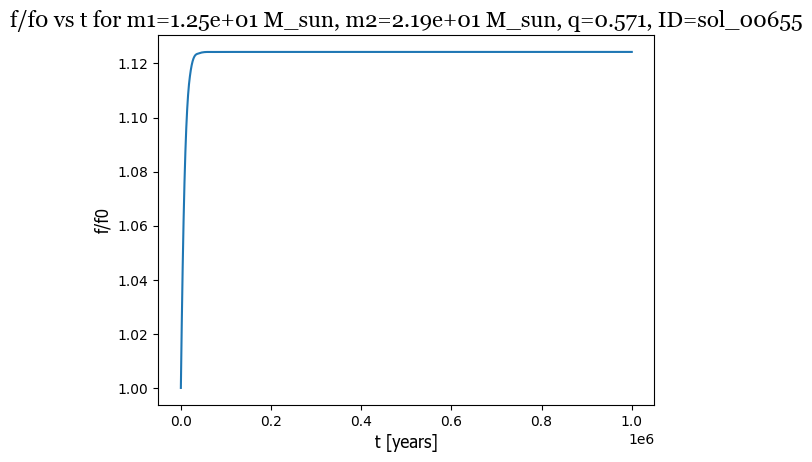

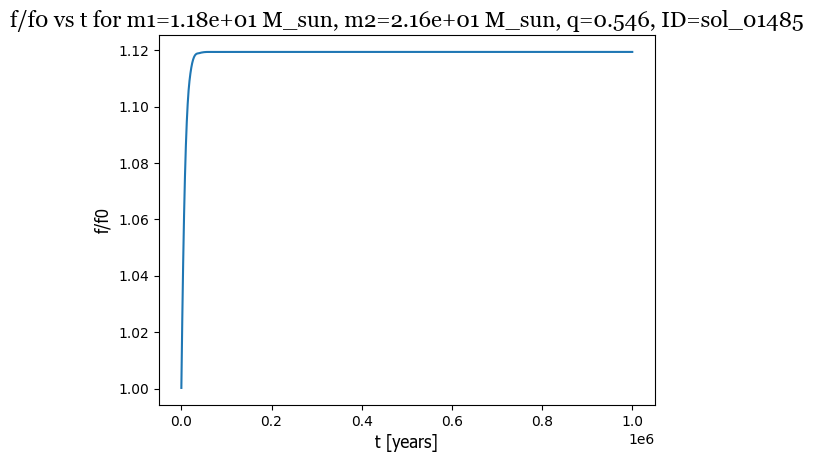

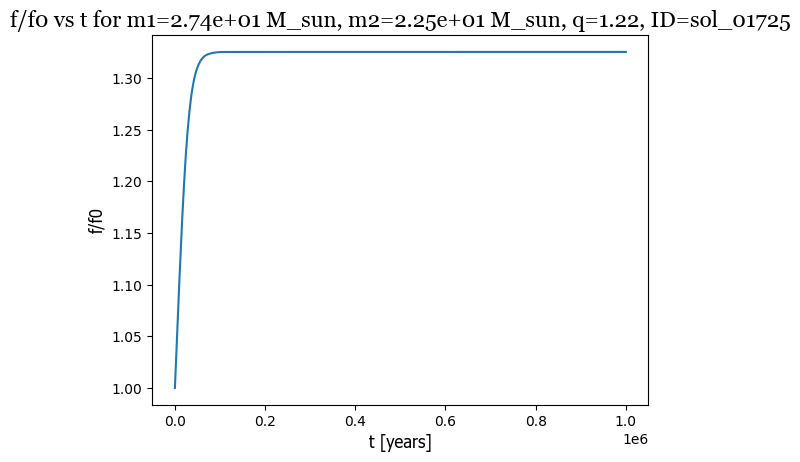

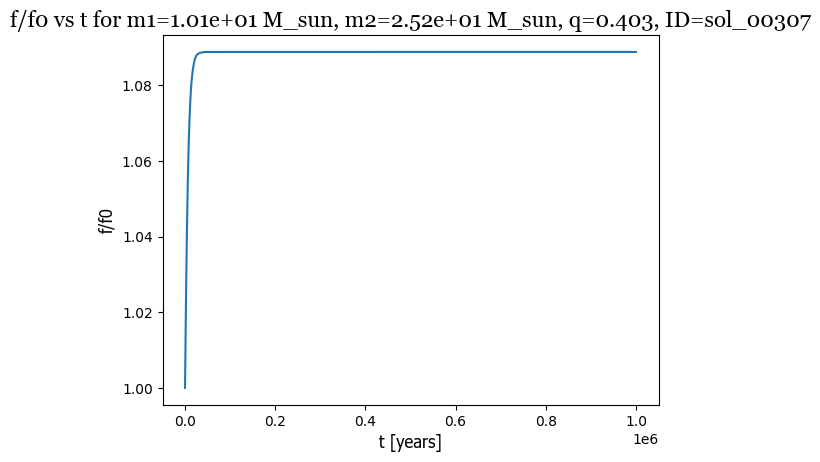

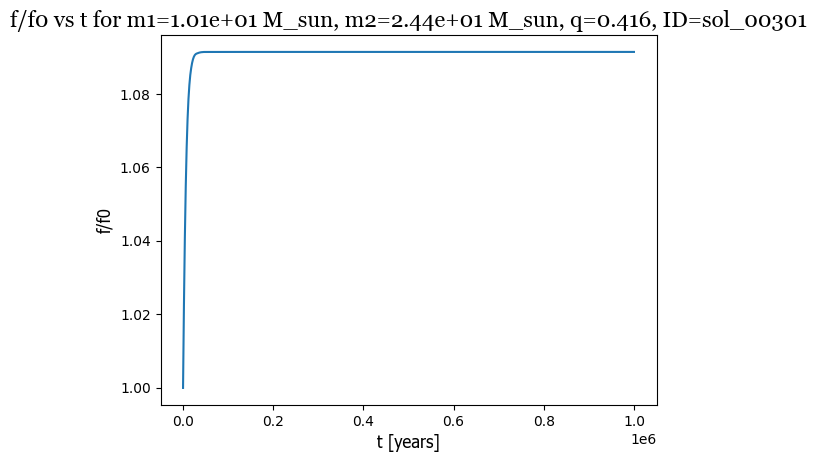

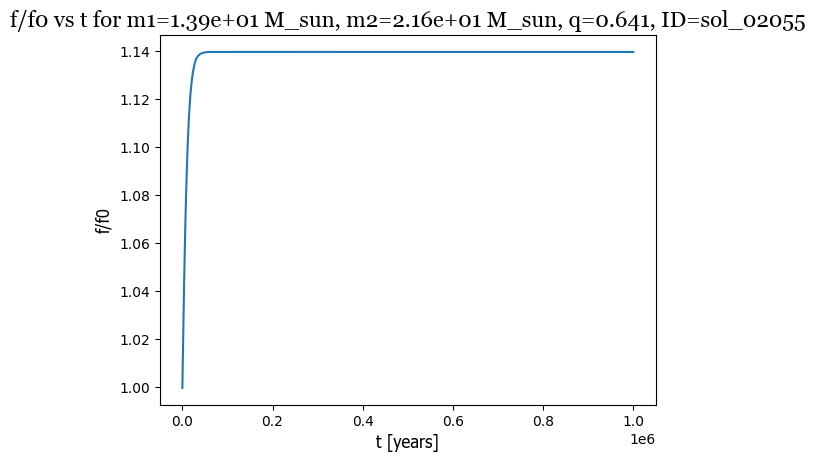

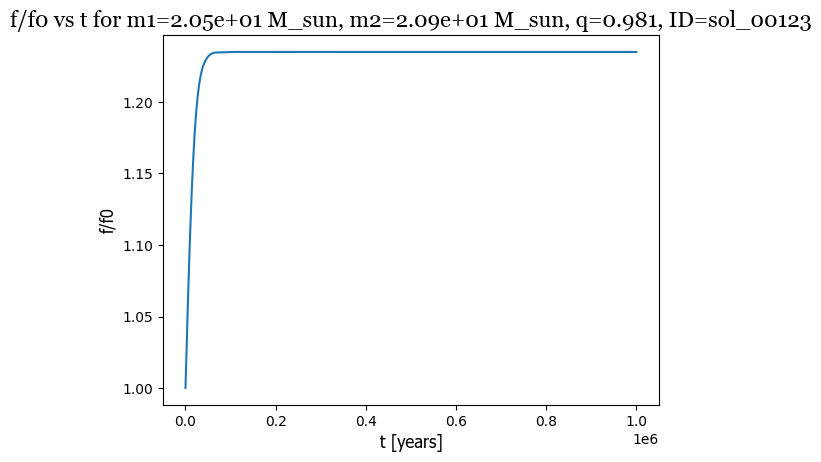

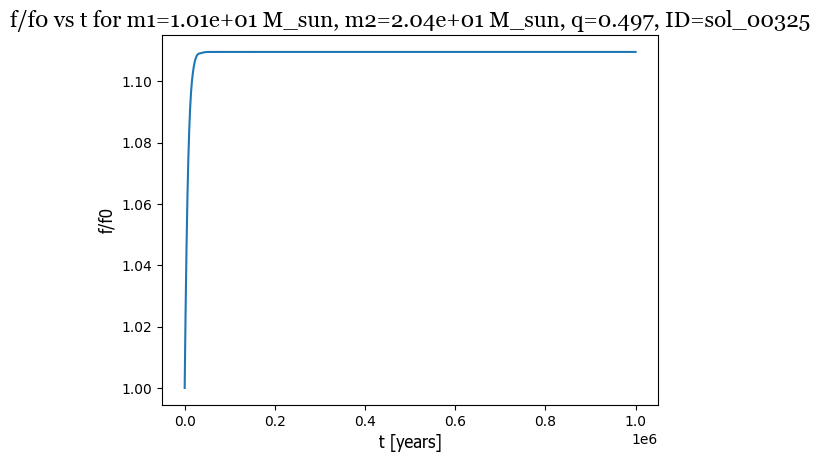

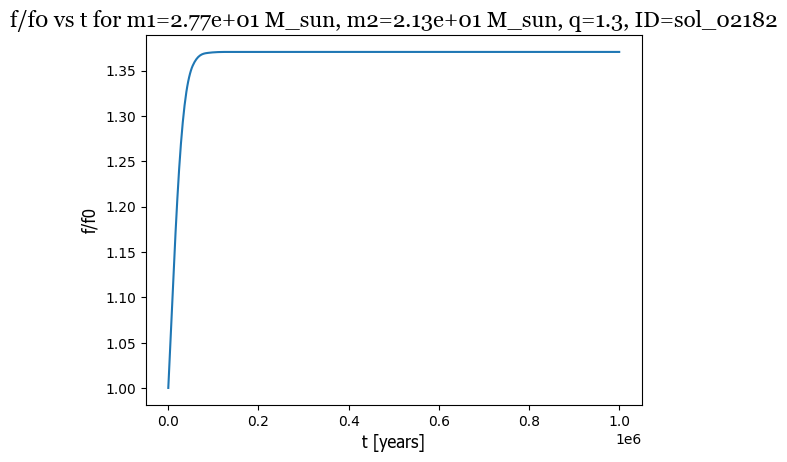

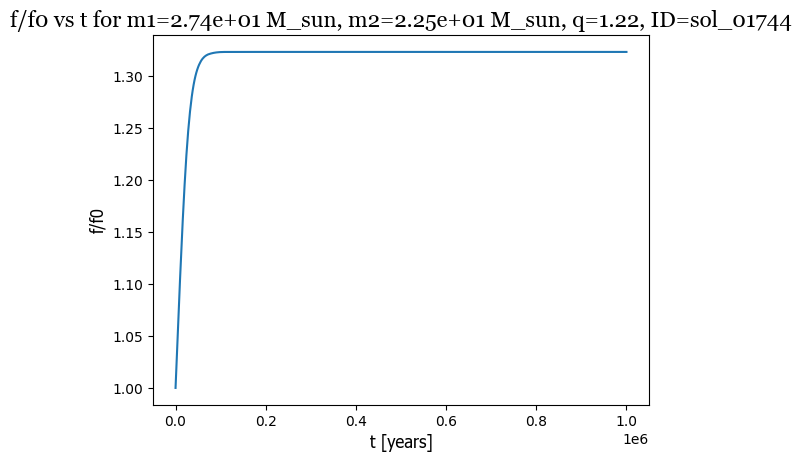

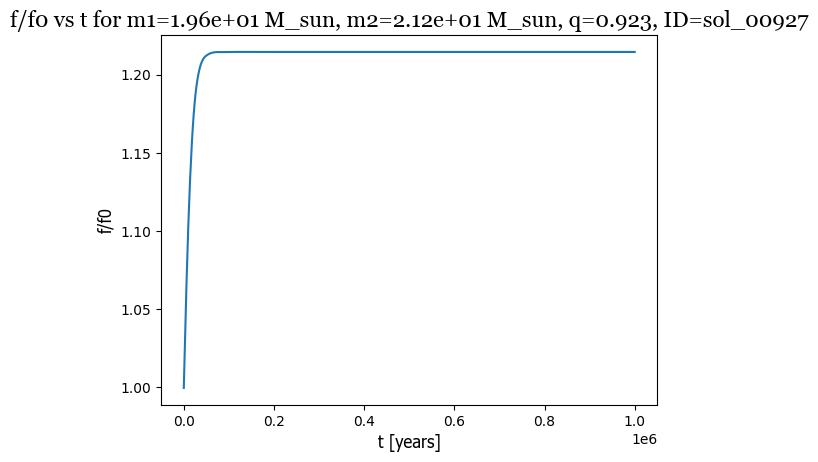

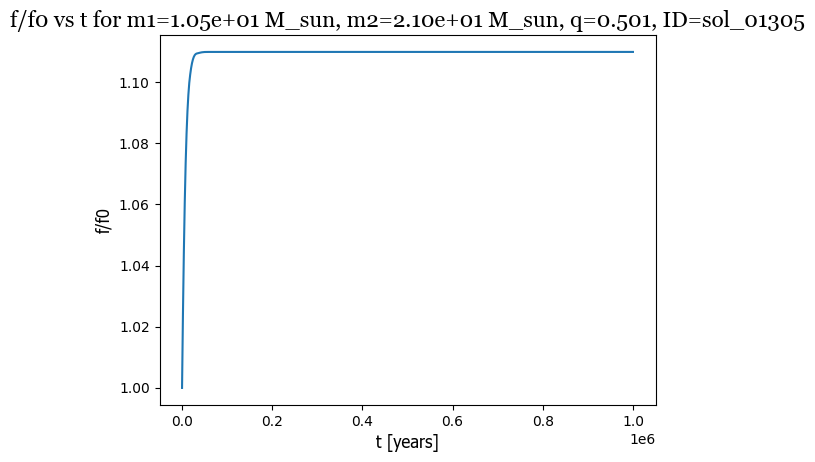

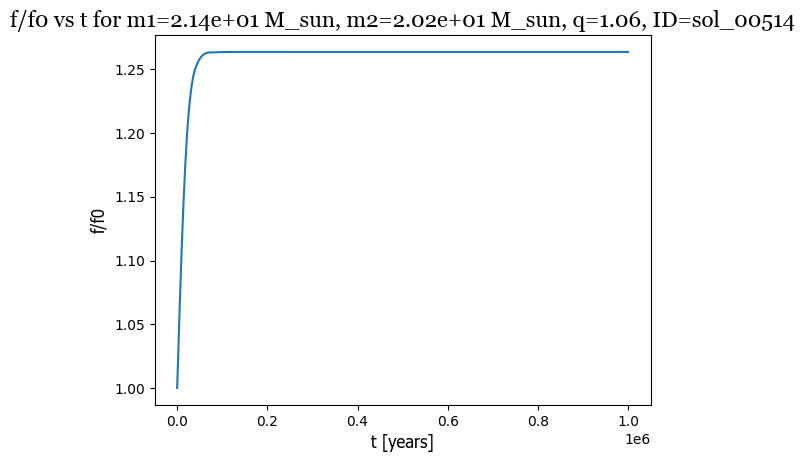

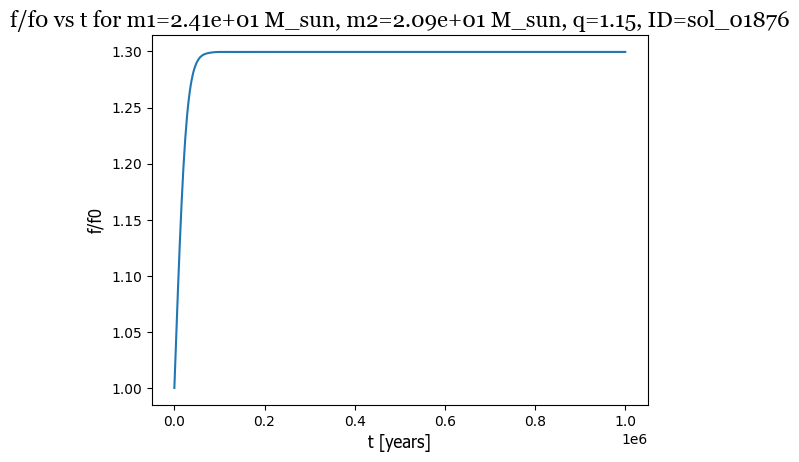

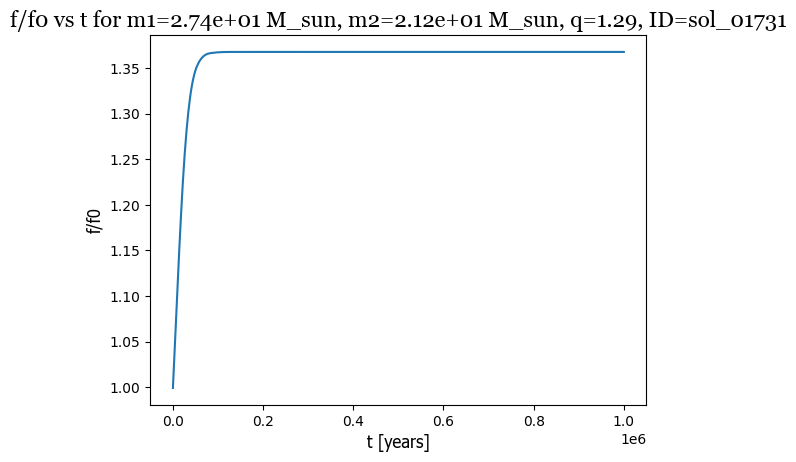

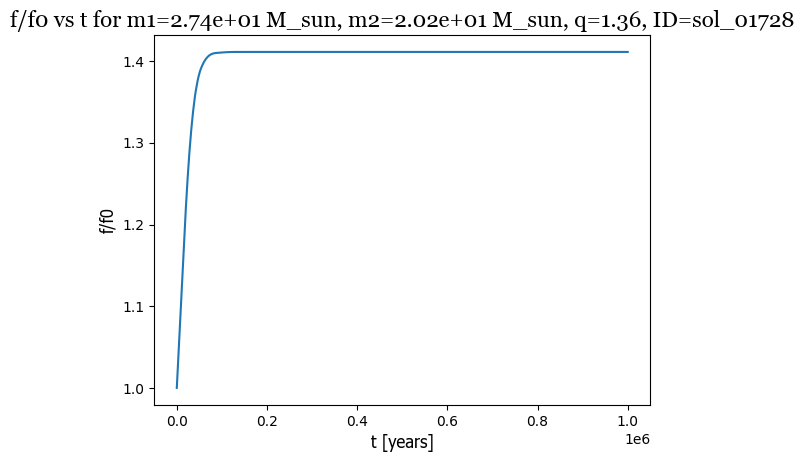

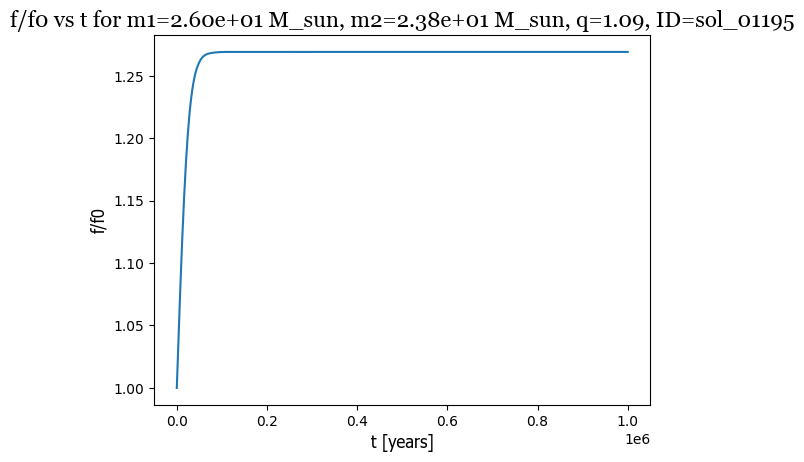

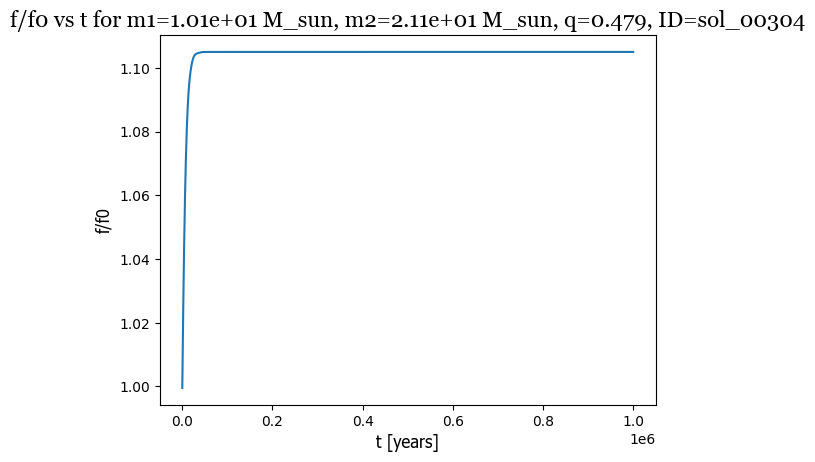

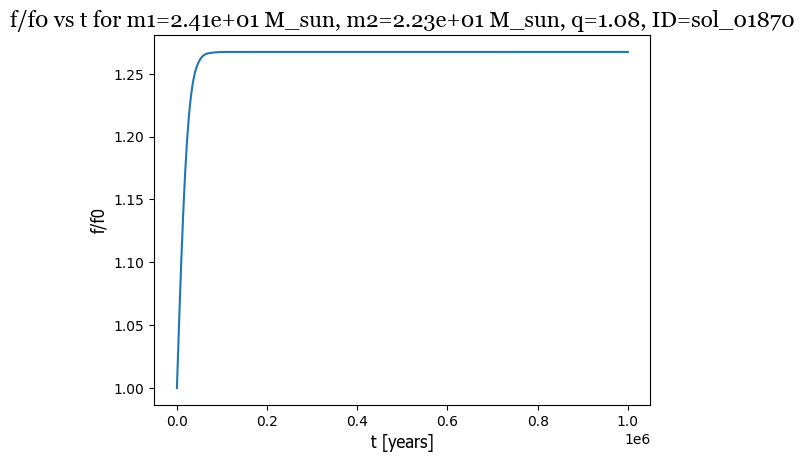

In [5]:
import random

with open("all_ok.csv", "r") as o:
    rows = list(csv.DictReader(o))
    
    for row in random.sample(rows, 20):

        sol_id = row["ID"]

        data = np.load(f"solutions/{sol_id}.npz")
        t = data["t"]
        f = data["f"]
        Omega = data["Omega"]

        # read metadata from csv
        m1 = float(row["m_WR/M_Sun"])
        m2 = float(row["m_companion/M_Sun"])
        a0 = float(row["initial separation a0 (m)"])
        Omega0 = float(row["initial spin Omega0 (Hz)"])
        f0 = float(row["initial frequency f0 (Hz)"])
        k = float(row["k"])
        Q = float(row["Q"])
        R1 = float(row["WR star Radius R_WR"])
        lifetime = float(row["lifetime (years)"])
        T_TF = float(row["tidal function timescale (years)"])
        f_final = float(row["f_final (Hz)"])
        Omega_final = float(row["Omega_final (Hz)"])
        J = float(row["final angular momentum J (kg m^2/s)"])
        a_spin = float(row["spin parameter a_spin"])
        a_final = float(row["final separation a_final (m)"])
        a_min_si = float(row["minimum separation a_min (m)"])
        q = m1/m2

        # plot f/f0(t)
        #p.plot2d(t, f/f0, xlabel='t [years]',
        #         ylabel='f/f0', title=f"f/f0 vs t for m1={format(m1, '.2e')} M_sun, m2={format(m2, '.2e')} M_sun, k={format(k, '.0e')}, Q={format(Q, '.0e')}, a0={format(a0, '.2e')} m, Ω0={format(Omega0, '.2e')} Hz, lifetime={format(lifetime, '.0e')} years, T_TF={format(T_TF, '.0e')} years, f0={format(f0, '.2e')} Hz, f_final={format(f_final, '.2e')} Hz, Omega_final={format(Omega_final, '.2e')} Hz", legend='f/f0(t)', colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)
        
        p.plot2d(t, f/f0, xlabel='t [years]',
                 ylabel='f/f0', title=f"f/f0 vs t for m1={format(m1, '.2e')} M_sun, m2={format(m2, '.2e')} M_sun, q={format(m1/m2, '.3')}, ID={format(sol_id)}", colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)
        
        # plot Omega(t)
        #p.plot2d(t, Omega, xlabel='t [years]',
        #         ylabel='Ω [Hz]', title=f"Ω vs t for m1={format(m1, '.2e')} M_sun, m2={format(m2, '.2e')} M_sun, k={format(k, '.0e')}, Q={format(Q, '.0e')}, a0={format(a0, '.2e')} m, Ω0={format(Omega0, '.2e')} Hz, lifetime={format(lifetime, '.0e')} years, T_TF={format(T_TF, '.0e')} years, f0={format(f0, '.2e')} Hz, f_final={format(f_final, '.2e')} Hz, Omega_final={format(Omega_final, '.2e')} Hz", legend='Ω(t)', colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)